In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("../data/output/_000/trn_base.csv")
df.head()

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,...,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,Engine,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
0,34.998,0.8400,100,449.44,555.32,1358.6,1137.2,5.48,8.00,194.64,...,14.73,8.8071,Train001,1,0,0,0,0,1,0
1,41.998,0.8408,100,445.00,549.90,1353.2,1125.8,3.91,5.71,138.51,...,10.41,6.2665,Train001,2,0,0,0,0,0,1
2,24.999,0.6218,60,462.54,537.31,1256.8,1047.5,7.05,9.02,175.71,...,14.08,8.6723,Train001,3,0,0,0,1,0,0
3,42.008,0.8416,100,445.00,549.51,1354.0,1126.4,3.91,5.71,138.46,...,10.59,6.4701,Train001,4,0,0,0,0,0,1
4,25.000,0.6203,60,462.54,537.07,1257.7,1047.9,7.05,9.03,175.05,...,14.13,8.5286,Train001,5,0,0,0,1,0,0


In [6]:
# Regimeを表すカラムの設定
df["Regime"]=np.nan
df.loc[df['Regime1'] ==1, 'Regime'] = 1
df.loc[df['Regime2'] ==1, 'Regime'] = 2
df.loc[df['Regime3'] ==1, 'Regime'] = 3
df.loc[df['Regime4'] ==1, 'Regime'] = 4
df.loc[df['Regime5'] ==1, 'Regime'] = 5
df.loc[df['Regime6'] ==1, 'Regime'] = 6

データ全体について分析

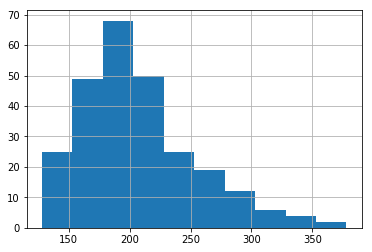

In [51]:
# 各データの個数を見る　
df.groupby("Engine").size().hist()
# ポアソン分布的、製造業っぽい

In [8]:
# 特にデータが多い（300>）のものを抽出
df.groupby("Engine").count()[df.groupby("Engine").count()["Altitude"]>300]
# Train112が一番生存した

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,...,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6,Regime
Engine,,,,,,,,,,,,,,,,,,,,,
Train031,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
Train085,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347
Train088,365,365,365,365,365,365,365,365,365,365,...,365,365,365,365,365,365,365,365,365,365
Train094,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306
Train105,303,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
Train112,378,378,378,378,378,378,378,378,378,378,...,378,378,378,378,378,378,378,378,378,378
Train118,344,344,344,344,344,344,344,344,344,344,...,344,344,344,344,344,344,344,344,344,344
Train128,303,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
Train158,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308


In [9]:
# 全体でのRegimeの個数を見る　
for i in range(1,7):
    df_tmp=df[df["Regime"+str(i)]==1]
    print("Regime"+str(i)+":"+str(round(100*len(df_tmp)/len(df)))+"%")
# Regime6だけ少し多い

Regime1:15%
Regime2:15%
Regime3:15%
Regime4:15%
Regime5:15%
Regime6:25%


In [10]:
# 各データの最終行を抜き取る
df_last=df[df["Engine"]!=df["Engine"].shift()]

In [11]:
len(df_last)

260

In [12]:
df_last[(df_last["FarbBurnerFuelAirRatio"]==0.02)&(df_last["Regime"]==3)]

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,...,WLptCoolantBleedLbmS,Engine,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6,Regime
1013,20.006,0.7000,100,491.19,606.93,1478.7,1246.1,9.35,13.66,336.02,...,14.627,Train006,1,0,0,1,0,0,0,3.0
1896,20.007,0.7006,100,491.19,607.08,1471.7,1247.4,9.35,13.65,335.22,...,14.795,Train011,1,0,0,1,0,0,0,3.0
3379,20.007,0.7008,100,491.19,607.53,1475.5,1244.5,9.35,13.65,334.82,...,14.783,Train018,1,0,0,1,0,0,0,3.0
4286,20.008,0.7007,100,491.19,606.79,1481.3,1245.6,9.35,13.66,335.33,...,14.796,Train023,1,0,0,1,0,0,0,3.0
4497,19.999,0.7000,100,491.19,607.42,1483.7,1247.0,9.35,13.66,333.78,...,14.664,Train024,1,0,0,1,0,0,0,3.0
6993,20.003,0.7000,100,491.19,607.47,1478.7,1249.3,9.35,13.65,334.36,...,14.686,Train036,1,0,0,1,0,0,0,3.0
7797,19.999,0.7000,100,491.19,607.67,1489.1,1250.0,9.35,13.66,333.74,...,14.681,Train040,1,0,0,1,0,0,0,3.0
7990,20.001,0.7000,100,491.19,607.03,1479.5,1237.1,9.35,13.65,335.18,...,14.680,Train041,1,0,0,1,0,0,0,3.0
9241,20.002,0.7016,100,491.19,607.53,1479.6,1249.0,9.35,13.65,334.53,...,14.802,Train047,1,0,0,1,0,0,0,3.0
11748,19.999,0.7013,100,491.19,607.44,1477.5,1254.0,9.35,13.66,334.56,...,14.609,Train060,1,0,0,1,0,0,0,3.0


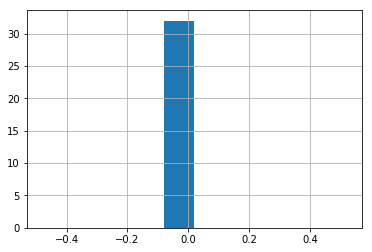

In [24]:
df_last[(df_last["Regime"]==3)]["FarbBurnerFuelAirRatio"].hist()
# 0.02のみ

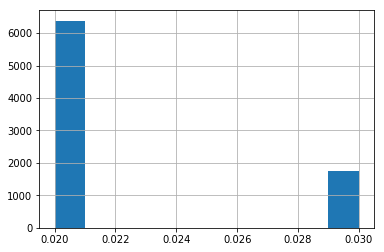

In [22]:
df[(df["Regime"]==3)]["FarbBurnerFuelAirRatio"].hist()
# 0.03もある

In [30]:

print(len((df[df["Regime"]==3])))
print("all data")
print(len(df[(df["FarbBurnerFuelAirRatio"]==0.02)&(df["Regime"]==3)]))
print(len(df[(df["FarbBurnerFuelAirRatio"]==0.03)&(df["Regime"]==3)]))
print("all data")
print(len(df_last[(df_last["FarbBurnerFuelAirRatio"]==0.02)&(df_last["Regime"]==3)]))
print(len(df_last[(df_last["FarbBurnerFuelAirRatio"]==0.03)&(df_last["Regime"]==3)]))

8122
6382
1740
32
0


C:\Users\KM70758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\KM70758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [31]:
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 50)
df.groupby("Regime").mean()

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,NfPhysicalFanSpeedRpm,NcPhysicalCoreSpeedRpm,EprEnginePressureRatioPP,PsStaticPressureAtHpcOutletPsia,PhiRatioOfFuelFlowToPsPpsPsi,NrfCorrectedFanSpeedRpm,NrcCorrectedCoreSpeedRpm,BprBypassRatio,FarbBurnerFuelAirRatio,HtbleedBleedEnthalpy,NfDmdDemandedFanSpeedRpm,PcnfrDmdDemandedCorrectedFanSpeedRpm,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
Regime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.001505,0.000494,100.0,518.67,642.678721,1590.424142,1408.864284,14.62,21.609831,553.360726,2388.105147,9062.834883,1.300000,47.541788,521.404623,2388.103394,8141.663451,8.442246,0.030000,393.198533,2388.0,100.00,38.817484,23.290057,108.945301,1.0,0.0,0.0,0.0,0.0,0.0
2.0,10.003018,0.250495,100.0,489.05,604.913381,1502.015205,1311.255818,10.52,15.493286,394.324910,2318.956991,8785.437549,1.259996,45.487942,371.445821,2388.165872,8135.129249,8.664625,0.030000,369.699728,2319.0,100.00,28.526285,17.115770,108.991724,0.0,1.0,0.0,0.0,0.0,0.0
3.0,20.003023,0.700515,100.0,491.19,607.564851,1485.590409,1253.121743,9.35,13.656623,334.496711,2324.019872,8729.770057,1.077731,44.448184,314.873344,2388.158422,8065.911894,9.232689,0.022142,365.384511,2324.0,100.00,24.454191,14.672800,109.030781,0.0,0.0,1.0,0.0,0.0,0.0
4.0,25.003055,0.620502,60.0,462.54,536.865069,1262.687866,1050.324119,7.05,9.027761,175.425952,1915.418208,8015.499600,0.939921,36.801377,164.572178,2028.316771,7878.462384,10.913999,0.020000,307.348163,1915.0,84.93,14.262839,8.558454,109.991377,0.0,0.0,0.0,1.0,0.0,0.0
5.0,35.003073,0.840501,100.0,449.44,555.799163,1366.716076,1131.534018,5.48,8.000296,194.443407,2223.041097,8356.103521,1.020391,41.982364,183.023262,2388.139032,8072.200000,9.332298,0.020000,334.235038,2223.0,100.00,14.830771,8.897900,109.495085,0.0,0.0,0.0,0.0,1.0,0.0
6.0,42.002998,0.840485,100.0,445.00,549.704881,1354.466005,1127.805291,3.91,5.715840,138.630382,2211.972633,8327.890942,1.020244,42.148784,130.549504,2388.053128,8089.438869,9.375055,0.020000,331.066503,2212.0,100.00,10.586419,6.351238,108.752118,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df_last.groupby("Regime").mean()

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,NfPhysicalFanSpeedRpm,NcPhysicalCoreSpeedRpm,EprEnginePressureRatioPP,PsStaticPressureAtHpcOutletPsia,PhiRatioOfFuelFlowToPsPpsPsi,NrfCorrectedFanSpeedRpm,NrcCorrectedCoreSpeedRpm,BprBypassRatio,FarbBurnerFuelAirRatio,HtbleedBleedEnthalpy,NfDmdDemandedFanSpeedRpm,PcnfrDmdDemandedCorrectedFanSpeedRpm,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
Regime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.001780,0.000383,100.0,518.67,642.375610,1586.309756,1401.826829,14.62,21.609756,553.873902,2388.056098,9054.256098,1.300000,47.333659,521.953902,2388.060976,8135.851220,8.419578,0.03,392.243902,2388.0,100.00,38.942439,23.357683,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2.0,10.002597,0.250509,100.0,489.05,604.676571,1498.825714,1305.837143,10.52,15.490286,394.708571,2318.882857,8778.708571,1.260000,45.292857,371.749429,2388.100000,8130.708571,8.640774,0.03,368.828571,2319.0,100.00,28.613714,17.166857,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3.0,20.003000,0.700516,100.0,491.19,607.248750,1482.187500,1246.937500,9.35,13.654063,334.804375,2323.931250,8724.209375,1.079062,44.259688,315.256562,2388.078125,8063.246875,9.204137,0.02,364.500000,2324.0,100.00,24.528125,14.713844,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4.0,25.002469,0.620416,60.0,462.54,536.638776,1259.042857,1045.175510,7.05,9.026122,175.594286,1915.357143,8009.377551,0.940000,36.615918,164.713878,2028.246939,7874.969388,10.879776,0.02,306.265306,1915.0,84.93,14.296939,8.585882,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5.0,35.003500,0.840350,100.0,449.44,555.597778,1363.675000,1127.308333,5.48,8.000000,194.505278,2222.913889,8348.530556,1.020556,41.802222,183.088889,2387.994444,8065.177778,9.300372,0.02,333.583333,2223.0,100.00,14.872778,8.923281,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6.0,42.003284,0.840499,100.0,445.00,549.387761,1351.210448,1123.207463,3.91,5.713433,138.780299,2211.894030,8320.520896,1.020000,41.980000,130.636716,2387.968657,8084.071642,9.355393,0.02,330.358209,2212.0,100.00,10.623582,6.361136,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df_last.groupby("Regime").mean()/df.groupby("Regime").mean()

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,NfPhysicalFanSpeedRpm,NcPhysicalCoreSpeedRpm,EprEnginePressureRatioPP,PsStaticPressureAtHpcOutletPsia,PhiRatioOfFuelFlowToPsPpsPsi,NrfCorrectedFanSpeedRpm,NrcCorrectedCoreSpeedRpm,BprBypassRatio,FarbBurnerFuelAirRatio,HtbleedBleedEnthalpy,NfDmdDemandedFanSpeedRpm,PcnfrDmdDemandedCorrectedFanSpeedRpm,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
Regime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1.183432,0.774617,1.0,1.0,0.999528,0.997413,0.995005,1.0,0.999997,1.000927,0.999979,0.999053,1.000000,0.995622,1.001053,0.999982,0.999286,0.997315,1.000000,0.997572,1.0,1.0,1.003219,1.002904,0.009179,1.0,NaN,NaN,NaN,NaN,NaN
2.0,0.999958,1.000054,1.0,1.0,0.999609,0.997877,0.995868,1.0,0.999806,1.000973,0.999968,0.999234,1.000003,0.995711,1.000817,0.999972,0.999457,0.997247,1.000000,0.997644,1.0,1.0,1.003065,1.002985,0.009175,NaN,1.0,NaN,NaN,NaN,NaN
3.0,0.999999,1.000001,1.0,1.0,0.999480,0.997709,0.995065,1.0,0.999813,1.000920,0.999962,0.999363,1.001236,0.995759,1.001217,0.999966,0.999670,0.996908,0.903247,0.997579,1.0,1.0,1.003023,1.002797,0.009172,NaN,NaN,1.0,NaN,NaN,NaN
4.0,0.999977,0.999862,1.0,1.0,0.999578,0.997113,0.995098,1.0,0.999819,1.000960,0.999968,0.999236,1.000084,0.994961,1.000861,0.999966,0.999557,0.996864,1.000000,0.996477,1.0,1.0,1.002391,1.003205,0.009092,NaN,NaN,NaN,1.0,NaN,NaN
5.0,1.000012,0.999821,1.0,1.0,0.999638,0.997775,0.996266,1.0,0.999963,1.000318,0.999943,0.999094,1.000162,0.995709,1.000359,0.999939,0.999130,0.996579,1.000000,0.998050,1.0,1.0,1.002832,1.002852,0.009133,NaN,NaN,NaN,NaN,1.0,NaN
6.0,1.000007,1.000016,1.0,1.0,0.999423,0.997596,0.995923,1.0,0.999579,1.001081,0.999964,0.999115,0.999760,0.995996,1.000668,0.999965,0.999337,0.997903,1.000000,0.997861,1.0,1.0,1.003510,1.001558,0.009195,NaN,NaN,NaN,NaN,NaN,1.0


In [49]:
df.groupby("Regime").std()

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,NfPhysicalFanSpeedRpm,NcPhysicalCoreSpeedRpm,EprEnginePressureRatioPP,PsStaticPressureAtHpcOutletPsia,PhiRatioOfFuelFlowToPsPpsPsi,NrfCorrectedFanSpeedRpm,NrcCorrectedCoreSpeedRpm,BprBypassRatio,FarbBurnerFuelAirRatio,HtbleedBleedEnthalpy,NfDmdDemandedFanSpeedRpm,PcnfrDmdDemandedCorrectedFanSpeedRpm,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
Regime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.000874,0.000647,0.0,0.0,0.495905,6.022058,8.936735,0.0,0.001289,0.868006,0.077643,19.212772,0.000000,0.263938,0.734694,0.077619,16.541497,0.036937,0.000000,1.521365,0.0,0.0,0.177530,0.105523,69.094230,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.002938,0.000640,0.0,0.0,0.474500,5.790246,8.457685,0.0,0.004697,0.671447,0.102582,18.250926,0.000192,0.252399,0.534520,0.099437,16.020960,0.038185,0.000000,1.489226,0.0,0.0,0.144014,0.085816,69.448756,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.002912,0.000656,0.0,0.0,0.463106,5.783426,7.793602,0.0,0.004735,0.606028,0.132332,17.210829,0.004189,0.237955,0.497392,0.131537,15.125523,0.038959,0.004103,1.466289,0.0,0.0,0.135061,0.079771,69.114348,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.002897,0.000651,0.0,0.0,0.358128,5.280828,6.808917,0.0,0.004181,0.447735,0.263995,14.100005,0.000884,0.208487,0.343794,0.277856,13.040218,0.043219,0.000000,1.292785,0.0,0.0,0.112084,0.066176,68.950524,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.002911,0.000648,0.0,0.0,0.439489,5.616519,7.401325,0.0,0.001695,0.476396,0.281245,16.988481,0.001938,0.230012,0.376085,0.301648,15.434833,0.038161,0.000000,1.404103,0.0,0.0,0.113182,0.067146,69.099370,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.002946,0.000637,0.0,0.0,0.432850,5.634030,7.636799,0.0,0.004929,0.439125,0.300962,18.014629,0.001544,0.238793,0.340672,0.324977,16.478442,0.037516,0.000000,1.408724,0.0,0.0,0.107921,0.064413,69.303143,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.groupby("Regime").std().apply(lambda x: (x-x.mean())/x.std())

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,NfPhysicalFanSpeedRpm,NcPhysicalCoreSpeedRpm,EprEnginePressureRatioPP,PsStaticPressureAtHpcOutletPsia,PhiRatioOfFuelFlowToPsPpsPsi,NrfCorrectedFanSpeedRpm,NrcCorrectedCoreSpeedRpm,BprBypassRatio,FarbBurnerFuelAirRatio,HtbleedBleedEnthalpy,NfDmdDemandedFanSpeedRpm,PcnfrDmdDemandedCorrectedFanSpeedRpm,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
Regime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,-2.040757,0.075666,NaN,NaN,1.081989,1.353238,1.445314,NaN,-1.395602,1.693005,-1.158939,1.091370,-0.950955,1.330609,1.726688,-1.120732,0.845266,-0.838813,-0.408248,1.117445,NaN,NaN,1.720960,1.722291,-0.417986,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.428295,-0.906590,NaN,NaN,0.635819,0.414608,0.814480,NaN,0.673584,0.518021,-0.908663,0.543637,-0.825403,0.724718,0.414976,-0.924431,0.445727,-0.285884,-0.408248,0.722568,NaN,NaN,0.464269,0.482755,1.580089,NaN,NaN,NaN,NaN,NaN,NaN
3.0,0.397285,1.391020,NaN,NaN,0.398331,0.386993,-0.060016,NaN,0.696451,0.126957,-0.610108,-0.048658,1.781303,-0.033750,0.171680,-0.635607,-0.241565,0.057537,2.041241,0.440754,NaN,NaN,0.128578,0.102523,-0.304608,NaN,NaN,NaN,NaN,NaN,NaN
4.0,0.380298,0.582755,NaN,NaN,-1.789849,-1.648079,-1.356693,NaN,0.360224,-0.819279,0.711206,-1.820148,-0.374412,-1.581078,-0.834830,0.680911,-1.842141,1.945458,-0.408248,-1.690979,NaN,NaN,-0.732960,-0.752575,-1.227903,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.396221,0.217490,NaN,NaN,-0.093956,-0.288832,-0.576584,NaN,-1.149107,-0.647954,0.884314,-0.175276,0.313027,-0.450789,-0.623228,0.894976,-0.004154,-0.296248,-0.408248,-0.323286,NaN,NaN,-0.691803,-0.691532,-0.389022,NaN,NaN,NaN,NaN,NaN,NaN
6.0,0.438658,-1.360341,NaN,NaN,-0.232334,-0.217928,-0.266500,NaN,0.814450,-0.870750,1.082190,0.409075,0.056439,0.010290,-0.855286,1.104883,0.796868,-0.582051,-0.408248,-0.266503,NaN,NaN,-0.889043,-0.863461,0.759431,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
データを見て気づいたこと
Flight Regimeの意味
1,高度が0、速度が0　
->地上にいる
2,高度が低い、速度も遅い
->
3,"FarbBurnerFuelAirRatio"はRegime3のみstdがある、またdf_lastには 0.03がない
->
4,PowerSettingが低い
->
5,
->
6,
->

In [ ]:
標準偏差が0のデータ
PowerSettingTra
TTotalTemperatureAtFanInletR
PPressureAtFanInletPsia
NfDmdDemandedFanSpeedRpm
PcnfrDmdDemandedCorrectedFanSpeedRpm

In [ ]:
航空機の知識
http://www.jal.com/ja/jiten/dict/p286.html

カラムの意味
Altitude	
Mach #	
Flight Regime	
Power Setting (TRA)	
T2 Total temperature at fan inlet ｰR	
T24 Total temperature at LPC outlet ｰR	
T30 Total temperature at HPC outlet ｰR	
T50 Total temperature at LPT outlet ｰR	
P2 Pressure at fan inlet psia	
P15 Total pressure in bypass-duct psia	
P30 Total pressure at HPC outlet psia	
Nf Physical fan speed rpm	
Nc Physical core speed rpm	
epr Engine pressure ratio (P50/P2) --	
Ps30 Static pressure at HPC outlet psia	
phi Ratio of fuel flow to Ps30 pps/psi	
NRf Corrected fan speed rpm	
NRc Corrected core speed rpm	
BPR Bypass Ratio --	farB Burner fuel-air ratio --	
htBleed (Bleed Enthalpy)	
Nf_dmd Demanded fan speed rpm	
PCNfR_dmd Demanded corrected fan speed rpm	
W31 HPT coolant bleed lbm/s	
W32 LPT coolant bleed lbm/s


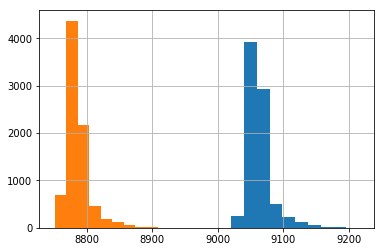

In [41]:
df[df["Regime"]==1]["NcPhysicalCoreSpeedRpm"].hist()
df[df["Regime"]==2]["NcPhysicalCoreSpeedRpm"].hist()

# df["NcPhysicalCoreSpeedRpm"].hist()

In [46]:
df_normal=df.groupby("Regime").mean().apply(lambda x: (x-x.mean())/x.std())
df_normal

,Altitude,Mach,PowerSettingTra,TTotalTemperatureAtFanInletR,TTotalTemperatureAtLpcOutletR,TTotalTemperatureAtHpcOutletR,TTotalTemperatureAtLptOutletR,PPressureAtFanInletPsia,PTotalPressureInBypassDuctPsia,PTotalPressureAtHpcOutletPsia,NfPhysicalFanSpeedRpm,NcPhysicalCoreSpeedRpm,EprEnginePressureRatioPP,PsStaticPressureAtHpcOutletPsia,PhiRatioOfFuelFlowToPsPpsPsi,NrfCorrectedFanSpeedRpm,NrcCorrectedCoreSpeedRpm,BprBypassRatio,FarbBurnerFuelAirRatio,HtbleedBleedEnthalpy,NfDmdDemandedFanSpeedRpm,PcnfrDmdDemandedCorrectedFanSpeedRpm,WHptCoolantBleedLbmS,WLptCoolantBleedLbmS,FlightNo,Regime1,Regime2,Regime3,Regime4,Regime5,Regime6
Regime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,-1.414256,-1.579963,0.408248,1.496341,1.439045,1.365221,1.453946,1.587987,1.599263,1.599689,0.939716,1.358212,1.363246,1.203584,1.599913,0.408108,0.809724,-1.021236,1.272783,1.372594,0.938823,0.408248,1.579198,1.579152,-0.557901,2.041241,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248
2.0,-0.771352,-0.850753,0.408248,0.458080,0.529605,0.626742,0.726338,0.526164,0.554095,0.601673,0.528069,0.628867,1.086353,0.650987,0.602015,0.408534,0.741773,-0.764500,1.272783,0.623245,0.528398,0.408248,0.617806,0.617823,-0.456637,-0.408248,2.041241,-0.408248,-0.408248,-0.408248,-0.408248
3.0,-0.128546,0.461880,0.408248,0.533093,0.593456,0.489545,0.292987,0.223156,0.240254,0.226227,0.558209,0.482503,-0.175232,0.371236,0.225555,0.408483,0.021952,-0.108672,-0.312276,0.485638,0.558139,0.408248,0.237395,0.237456,-0.371443,-0.408248,-0.408248,2.041241,-0.408248,-0.408248,-0.408248
4.0,0.192860,0.228494,-2.041241,-0.471167,-1.109088,-1.372359,-1.218736,-0.372502,-0.550705,-0.772008,-1.874245,-1.395489,-1.129108,-1.686173,-0.774621,-2.041241,-1.927414,1.832393,-0.744430,-1.365072,-1.874672,-2.041241,-0.714669,-0.714540,1.723922,-0.408248,-0.408248,-0.408248,2.041241,-0.408248,-0.408248
5.0,0.835667,0.870193,0.408248,-0.930357,-0.653130,-0.503412,-0.613370,-0.779102,-0.726274,-0.652665,-0.042929,-0.499958,-0.572123,-0.292205,-0.651839,0.408351,0.087345,0.006326,-0.744430,-0.507682,-0.042629,0.408248,-0.661614,-0.661689,0.641353,-0.408248,-0.408248,-0.408248,-0.408248,2.041241,-0.408248
6.0,1.285627,0.870148,0.408248,-1.085991,-0.799888,-0.605737,-0.641165,-1.185703,-1.116632,-1.002915,-0.108821,-0.574135,-0.573135,-0.247429,-1.001024,0.407766,0.266619,0.055688,-0.744430,-0.608723,-0.108059,0.408248,-1.058116,-1.058201,-0.979295,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,2.041241


In [45]:
df.groupby("Regime")